### Problem

**Here**

#### Import all the necessary libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import folium
import requests
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import json
import matplotlib.cm as cm
import matplotlib.colors as colors
from bs4 import BeautifulSoup
import csv

### Let's Read the data 

*I have used https://ceodelhi.gov.in/Content/EntireDelhiLocalities.aspx to find the neighbourhoods in delhi.*

In [3]:
row_data=pd.read_html('https://ceodelhi.gov.in/Content/EntireDelhiLocalities.aspx')
row_data

[    0   1   2   3   4
 0 NaN NaN NaN NaN NaN,
           0              1                                   2
 0       NaN            NaN                                 NaN
 1     AC_NO        AC NAME                IMPORTANT LOCALITIES
 2         1         NERELA                    SECTOR-A6 NARELA
 3         1         NERELA                  VIJAY NAGAR NARELA
 4         1         NERELA  (METRO VIHAR PHASE-I)HOLAMBI KALAN
 ...     ...            ...                                 ...
 2286     70  KARAWAL NAGAR                    TUKMIRPUR & VILL
 2287     70  KARAWAL NAGAR                      TUKMIRPUR EXTN
 2288     70  KARAWAL NAGAR                  VILL KHAJOORI KHAS
 2289     70  KARAWAL NAGAR                    WEST KAMAL VIHAR
 2290     70  KARAWAL NAGAR                  WEST KARAWAL NAGAR
 
 [2291 rows x 3 columns],
    0  1  2  3  4  5  6  7
 0  4  0  3  0  1  0  8  2]

**In the data above there are 3 lists the data that we have rquired is at index 1**
**So, Let's slice this one from the row data.**

In [4]:
print(row_data[1])
row_data=row_data[1]

          0              1                                   2
0       NaN            NaN                                 NaN
1     AC_NO        AC NAME                IMPORTANT LOCALITIES
2         1         NERELA                    SECTOR-A6 NARELA
3         1         NERELA                  VIJAY NAGAR NARELA
4         1         NERELA  (METRO VIHAR PHASE-I)HOLAMBI KALAN
...     ...            ...                                 ...
2286     70  KARAWAL NAGAR                    TUKMIRPUR & VILL
2287     70  KARAWAL NAGAR                      TUKMIRPUR EXTN
2288     70  KARAWAL NAGAR                  VILL KHAJOORI KHAS
2289     70  KARAWAL NAGAR                    WEST KAMAL VIHAR
2290     70  KARAWAL NAGAR                  WEST KARAWAL NAGAR

[2291 rows x 3 columns]


*In above data there is a row with full of missing values so we will remove it and make all the values at index 1 to column of our data.*

In [5]:
row_data.drop(0,inplace=True)
row_data.columns=row_data.iloc[0,:]
row_data.drop(1,inplace=True)
row_data

1,AC_NO,AC NAME,IMPORTANT LOCALITIES
2,1,NERELA,SECTOR-A6 NARELA
3,1,NERELA,VIJAY NAGAR NARELA
4,1,NERELA,(METRO VIHAR PHASE-I)HOLAMBI KALAN
5,1,NERELA,(METRO VIHAR PHASE-II)HOLAMBI KALAN
6,1,NERELA,DESU COLONY NARELA
...,...,...,...
2286,70,KARAWAL NAGAR,TUKMIRPUR & VILL
2287,70,KARAWAL NAGAR,TUKMIRPUR EXTN
2288,70,KARAWAL NAGAR,VILL KHAJOORI KHAS
2289,70,KARAWAL NAGAR,WEST KAMAL VIHAR


*We have required only neighbourhoods in delhi so we will select "AC NAME" column from the data*

In [10]:
final_data=row_data['AC NAME'].unique()
final_data=pd.DataFrame(final_data)
final_data

,0
0,NERELA
1,BURARI
2,TIMARPUR
3,ADARSH NAGAR
4,BADLI
...,...
65,GHONDA
66,BABARPUR
67,GOKALPUR
68,MUSTAFABAD


#### Crate a CSV file of these neighbourhoods in Delhi

In [17]:
csv_file = open('Delhi.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [18]:
for i in final_data[0]:
    csv_writer.writerow([i])
csv_file.close()
print("CSV file has created")

CSV file has created


In [19]:
Delhi_data=pd.read_csv('Delhi.csv')
Delhi_data.head()

,Neighbourhood
0,NERELA
1,BURARI
2,TIMARPUR
3,ADARSH NAGAR
4,BADLI


#### Let's get the Longitude and Latitude of Each neighbourhood in Delhi

In [25]:
import geocoder
lat = []
lng = []
lat_lng_coords = None
# Get postcodes from neighbourhoods table
neighbourhoods = Delhi_data['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Delhi, India'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [26]:
Delhi_data['Latitude']=lat      #adding a column named Latitude and adding all the values of lat to it
Delhi_data['Longitude']=lng     #adding a column named Longitude and adding all the values of lng to it.

In [27]:
Delhi_data

,Neighbourhood,Latitude,Longitude
0,NERELA,28.83979,77.076960
1,BURARI,28.75660,77.206950
2,TIMARPUR,28.70078,77.221160
3,ADARSH NAGAR,28.72035,77.172640
4,BADLI,28.73165,77.134060
...,...,...,...
65,GHONDA,28.69020,77.269928
66,BABARPUR,28.50738,77.303460
67,GOKALPUR,28.70568,77.289110
68,MUSTAFABAD,28.71480,77.274990


#### Get the Latitude and Longitude of Delhi 

In [56]:
from geopy.geocoders import Nominatim

address = 'Delhi, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6273928, 77.1716954.


#### Let's Visualize all the neighbourhoods on the Map using Folium Library

In [18]:
import folium
delhi_map=folium.Map(location=[latitude,longitude],zoom_start=10)
for lat, lng, label in zip(Delhi_data['Latitude'], Delhi_data['Longitude'], Delhi_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(delhi_map)
delhi_map

#### Credentials to get the data from FOURSQUARE API

In [28]:
CLIENT_ID = 'JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W' # your Foursquare ID
CLIENT_SECRET = 'QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W
CLIENT_SECRET:QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ


#### Define get_category_type Function
*To get the category type of the venues around the neighbourhoods.*

In [30]:
def get_category_type(row):
    categories_list = row.Category
    if len(categories_list) == 0:
        return None
    else:
        
        return categories_list[0]['name']

**In the below cell we are besically gonna create a list of lists that contain neighbourhood it's latitude and longitude, Venue, Venue category, it's longitude and latitude.**

In [32]:
explore_df_list = []

for i, nhood_name in enumerate(Delhi_data['Neighbourhood']): 
    try :
        #Get neighbourhood data
        nhood_name = Delhi_data.loc[i, 'Neighbourhood']
        nhood_lat = Delhi_data.loc[i, 'Latitude']
        nhood_lng = Delhi_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = requests.get(url).json()
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results)                        # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

***Let's Create a DataFrame using this List of Lists.***

In [34]:
explore_Delhi = pd.DataFrame([item for item in explore_df_list])
explore_Delhi.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_Delhi.tail(20)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
697,GHONDA,28.69020,77.269928,Yamuna Biodiversity Park,Botanical Garden,28.698583,77.266627
698,BABARPUR,28.50738,77.303460,Faridabad Railway Station,Train Station,28.504600,77.299299
699,BABARPUR,28.50738,77.303460,Pind Balluchi,Indian Restaurant,28.507440,77.297209
700,BABARPUR,28.50738,77.303460,Sagar Ratna,Indian Restaurant,28.507452,77.297201
701,BABARPUR,28.50738,77.303460,Tughlaqabad Metro Station,Light Rail Station,28.502379,77.299231
702,BABARPUR,28.50738,77.303460,Tughlakabad Railway Station,Train Station,28.504789,77.296243
703,BABARPUR,28.50738,77.303460,Local tea shop,Snack Place,28.513199,77.296747
704,GOKALPUR,28.70568,77.289110,Domino's Pizza,Pizza Place,28.701610,77.281235
705,GOKALPUR,28.70568,77.289110,Axis Bank ATM,ATM,28.705750,77.291780
706,GOKALPUR,28.70568,77.289110,Axis Bank ATM,ATM,28.712073,77.290388


### Crate a Sparse Matrix
***Here we'll create a sparse matrix of venue category that will tell about whether a particular neighbourhood has that category of venue or not.***

In [35]:
Delhi_1_hot=pd.get_dummies(explore_Delhi[['Venue Category']],prefix='',prefix_sep='')     #Getting Sparse Matrix
Delhi_1_hot['Neighbourhood']=explore_Delhi['Neighbourhood']                 #Adding Neighbourhoods        

columns=[Delhi_1_hot.columns[-1]]+Delhi_1_hot.columns[:-1].tolist()     #To bring Neighbourhoods in front
Delhi_1_hot=Delhi_1_hot[columns]                                        
Delhi_1_hot.head()

,Neighbourhood,ATM,Afghan Restaurant,Airport Lounge,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,...,Sporting Goods Shop,Stadium,Steakhouse,Thai Restaurant,Theme Park,Tibetan Restaurant,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Women's Store
0,NERELA,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NERELA,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NERELA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NERELA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BURARI,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
Delhi_Grouped=Delhi_1_hot.groupby('Neighbourhood').mean().reset_index()
Delhi_Grouped.head()

,Neighbourhood,ATM,Afghan Restaurant,Airport Lounge,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,...,Sporting Goods Shop,Stadium,Steakhouse,Thai Restaurant,Theme Park,Tibetan Restaurant,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Women's Store
0,ADARSH NAGAR,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0
1,AMBEDKAR NAGAR (SC),0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,BABARPUR,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0
3,BADARPUR,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0
4,BADLI,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


#### Function to get top common Venues

In [38]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:top_venues]

In [39]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
columns

['Neighbourhood',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue']

#### Getting Top common Venues

In [42]:
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Delhi_Grouped['Neighbourhood']

for ind in np.arange(Delhi_Grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(Delhi_Grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.tail()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,TUGHLAKABAD,Women's Store,ATM,Vegetarian / Vegan Restaurant,Food & Drink Shop,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner
64,UTTAM NAGAR,ATM,Indian Restaurant,Paper / Office Supplies Store,Electronics Store,Pizza Place,Café,IT Services,Train Station,Deli / Bodega,Department Store
65,VIKASPURI,ATM,Café,Men's Store,Fast Food Restaurant,Pizza Place,Business Service,Ice Cream Shop,Department Store,Diner,Dessert Shop
66,VISHWAS NAGAR,Hotel,Asian Restaurant,Multiplex,Café,Shopping Mall,BBQ Joint,Big Box Store,Indian Restaurant,Grocery Store,Food
67,WAZIRPUR,Coffee Shop,Shopping Mall,Indian Restaurant,Multiplex,Fast Food Restaurant,Playground,Pizza Place,Sandwich Place,Vegetarian / Vegan Restaurant,Snack Place


#### Prepare the Data for Clustering

In [45]:
Delhi_grouped_clustering = Delhi_Grouped.drop('Neighbourhood', axis=1)
Delhi_grouped_clustering

,ATM,Afghan Restaurant,Airport Lounge,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,...,Sporting Goods Shop,Stadium,Steakhouse,Thai Restaurant,Theme Park,Tibetan Restaurant,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Women's Store
0,0.250,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.000000,0.0,0.0
1,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.0
3,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.0
4,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.500,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.5
64,0.200,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.000000,0.0,0.0
65,0.125,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
66,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.100000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


#### Function to plot Cluster number and silhouette_score

In [46]:
def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

#### Applying Kmeans Unsupervised Algorithm on the Data using different different cluster numbers

In [47]:
from sklearn.cluster import KMeans
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for Delhi_clusters in range(2, max_range) :
    
    # Run k-means clustering
    Delhi_gc = Delhi_grouped_clustering
    kmeans = KMeans(n_clusters = Delhi_clusters, init = 'k-means++', random_state = 0).fit_predict(Delhi_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(Delhi_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(Delhi_clusters)
    scores.append(score)

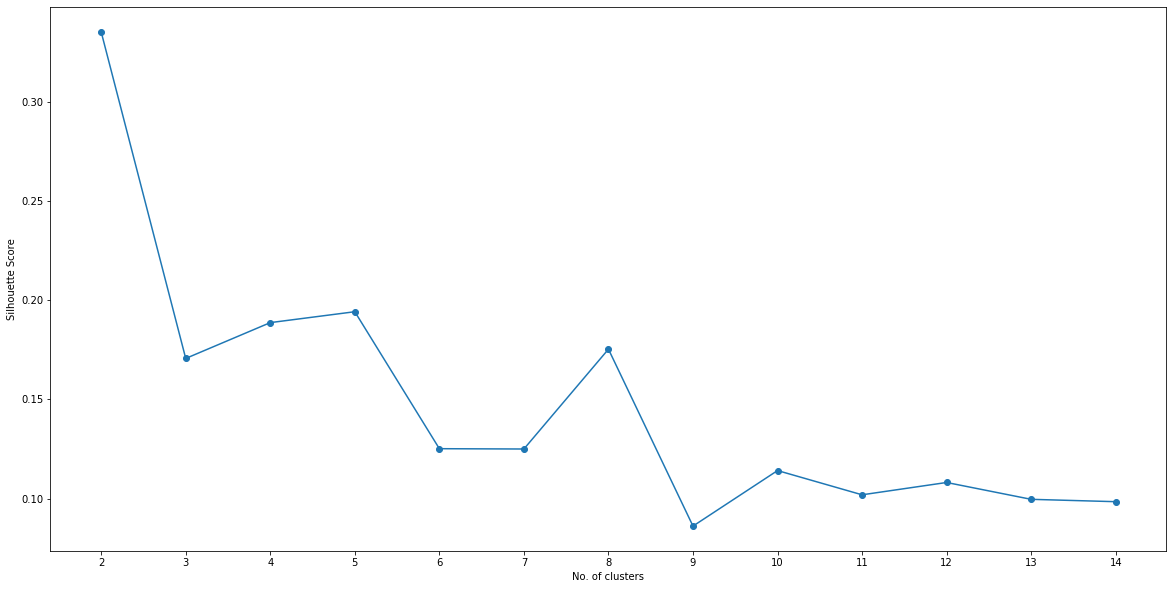

In [49]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [50]:
opt_value=6

#### Let's Cluster the Neighbourhood that have approx similer venues.

In [51]:
Delhi_clusters = opt_value
# Run k-means clustering
Delhi_gc = Delhi_grouped_clustering
kmeans = KMeans(n_clusters = Delhi_clusters, init = 'k-means++', random_state = 0).fit(Delhi_gc)

In [52]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighbourhoods_venues_sorted

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5,ADARSH NAGAR,ATM,Train Station,Light Rail Station,North Indian Restaurant,Airport Lounge,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner
1,2,AMBEDKAR NAGAR (SC),Sandwich Place,Indian Restaurant,Plaza,Pharmacy,Flea Market,Deli / Bodega,Department Store,Cosmetics Shop,Food,Diner
2,2,BABARPUR,Train Station,Indian Restaurant,Light Rail Station,Snack Place,Women's Store,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market,English Restaurant
3,2,BADARPUR,Train Station,Indian Restaurant,Light Rail Station,Snack Place,Women's Store,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market,English Restaurant
4,2,BADLI,Metro Station,Gym,Pizza Place,Electronics Store,Food & Drink Shop,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner
...,...,...,...,...,...,...,...,...,...,...,...,...
63,1,TUGHLAKABAD,Women's Store,ATM,Vegetarian / Vegan Restaurant,Food & Drink Shop,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner
64,5,UTTAM NAGAR,ATM,Indian Restaurant,Paper / Office Supplies Store,Electronics Store,Pizza Place,Café,IT Services,Train Station,Deli / Bodega,Department Store
65,2,VIKASPURI,ATM,Café,Men's Store,Fast Food Restaurant,Pizza Place,Business Service,Ice Cream Shop,Department Store,Diner,Dessert Shop
66,2,VISHWAS NAGAR,Hotel,Asian Restaurant,Multiplex,Café,Shopping Mall,BBQ Joint,Big Box Store,Indian Restaurant,Grocery Store,Food


In [54]:
Delhi_final = Delhi_data
Delhi_final = Delhi_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
Delhi_final.dropna(inplace = True)
Delhi_final['Cluster Labels'] = Delhi_final['Cluster Labels'].astype(int)
Delhi_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,NERELA,28.83979,77.07696,1,ATM,Multiplex,Furniture / Home Store,Food & Drink Shop,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop
1,BURARI,28.75660,77.20695,5,ATM,Ice Cream Shop,Café,Food Court,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store
2,TIMARPUR,28.70078,77.22116,2,Asian Restaurant,Tibetan Restaurant,Restaurant,Café,Hotel,Coffee Shop,Metro Station,Department Store,Dessert Shop,Deli / Bodega
3,ADARSH NAGAR,28.72035,77.17264,5,ATM,Train Station,Light Rail Station,North Indian Restaurant,Airport Lounge,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner
4,BADLI,28.73165,77.13406,2,Metro Station,Gym,Pizza Place,Electronics Store,Food & Drink Shop,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner


In [57]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(Delhi_clusters)
ys = [i + x + (i*x)**2 for i in range(Delhi_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Delhi_final['Latitude'], Delhi_final['Longitude'], Delhi_final['Neighbourhood'], 
                                  Delhi_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

#### Now let's see all the 6 clusters one by one 

In [58]:
val = 1
Delhi_final.loc[Delhi_final['Cluster Labels'] == (val - 1), Delhi_final.columns[[0] + np.arange(4, Delhi_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,RITHALA,Hotel,Clothing Store,Restaurant,Light Rail Station,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market,English Restaurant,Donut Shop
28,TILAK NAGAR,Clothing Store,Metro Station,Light Rail Station,Fast Food Restaurant,Donut Shop,Coffee Shop,Department Store,Dessert Shop,Diner,Food Court
64,SEELAMPUR,Clothing Store,Light Rail Station,Shopping Mall,Platform,Train Station,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner


In [59]:
val = 2
Delhi_final.loc[Delhi_final['Cluster Labels'] == (val - 1), Delhi_final.columns[[0] + np.arange(4, Delhi_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,NERELA,ATM,Multiplex,Furniture / Home Store,Food & Drink Shop,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop
35,BIJWASAN,ATM,Food Court,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant
48,SANGAM VIHAR,ATM,Food Court,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant
51,TUGHLAKABAD,Women's Store,ATM,Vegetarian / Vegan Restaurant,Food & Drink Shop,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner
67,GOKALPUR,ATM,Pizza Place,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store
69,KARAWAL NAGAR,ATM,Food Court,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant


In [65]:
val = 3
Delhi_final.loc[Delhi_final['Cluster Labels'] == (val - 1),Delhi_final.columns[[0] + np.arange(4, Delhi_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,TIMARPUR,Asian Restaurant,Tibetan Restaurant,Restaurant,Café,Hotel,Coffee Shop,Metro Station,Department Store,Dessert Shop,Deli / Bodega
4,BADLI,Metro Station,Gym,Pizza Place,Electronics Store,Food & Drink Shop,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner
13,SHALIMAR BAGH,Hotel,Restaurant,Indian Restaurant,Convenience Store,Coffee Shop,Arcade,Food Truck,Department Store,Dessert Shop,Diner
14,SHAKUR BASTI,Train Station,Vegetarian / Vegan Restaurant,Convenience Store,Women's Store,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,English Restaurant,Electronics Store
16,WAZIRPUR,Coffee Shop,Shopping Mall,Indian Restaurant,Multiplex,Fast Food Restaurant,Playground,Pizza Place,Sandwich Place,Vegetarian / Vegan Restaurant,Snack Place
17,MODEL TOWN,Pizza Place,Food Truck,Snack Place,Chinese Restaurant,Donut Shop,Fast Food Restaurant,Convenience Store,Bakery,Shopping Mall,Frozen Yogurt Shop
18,SADAR BAZAR,Convenience Store,Shoe Store,Mobile Phone Shop,Indian Restaurant,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market,English Restaurant,Donut Shop
19,CHANDNI CHOWK,Indian Restaurant,Snack Place,Dessert Shop,Fast Food Restaurant,Market,Food & Drink Shop,Hardware Store,Paper / Office Supplies Store,Mosque,Monument / Landmark
20,MATIA MAHAL,Indian Restaurant,Snack Place,Hotel,Fast Food Restaurant,Market,Restaurant,Light Rail Station,Flea Market,Dessert Shop,Mosque
21,BALLIMARAN,Indian Restaurant,Snack Place,Hotel,Market,Dessert Shop,Miscellaneous Shop,Flea Market,Food & Drink Shop,Mosque,Pizza Place


In [61]:
val = 4
Delhi_final.loc[Delhi_final['Cluster Labels'] == (val - 1), Delhi_final.columns[[0] + np.arange(4, Delhi_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,NAJAFGARH,Resort,Women's Store,Comfort Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store


In [62]:
val = 5
Delhi_final.loc[Delhi_final['Cluster Labels'] == (val - 1), Delhi_final.columns[[0] + np.arange(4, Delhi_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,KIRARI,Department Store,Women's Store,Food Court,Cosmetics Shop,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant


In [63]:
val = 6
Delhi_final.loc[Delhi_final['Cluster Labels'] == (val - 1), Delhi_final.columns[[0] + np.arange(4, Delhi_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,BURARI,ATM,Ice Cream Shop,Café,Food Court,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store
3,ADARSH NAGAR,ATM,Train Station,Light Rail Station,North Indian Restaurant,Airport Lounge,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner
9,SULTANPUR MAJRA,ATM,Mobile Phone Shop,Soccer Field,Buffet,English Restaurant,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Food & Drink Shop
10,NANGLOI JAT,ATM,Shoe Store,Train Station,Breakfast Spot,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market,English Restaurant,Donut Shop
11,MANGOL PURI (SC),ATM,Health Food Store,Chinese Restaurant,Playground,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,English Restaurant,Electronics Store
12,ROHINI,ATM,Juice Bar,Multiplex,Pizza Place,Flea Market,Fast Food Restaurant,Farmers Market,English Restaurant,Electronics Store,Diner
15,TRI NAGAR,Train Station,ATM,Mobile Phone Shop,Burger Joint,Electronics Store,Flea Market,Fast Food Restaurant,Farmers Market,English Restaurant,Donut Shop
31,UTTAM NAGAR,ATM,Indian Restaurant,Paper / Office Supplies Store,Electronics Store,Pizza Place,Café,IT Services,Train Station,Deli / Bodega,Department Store
33,MATIALA,ATM,Café,Indian Restaurant,Lighting Store,Convenience Store,Dessert Shop,Department Store,Diner,Food & Drink Shop,Electronics Store
36,PALAM,ATM,IT Services,Mobile Phone Shop,Sporting Goods Shop,Airport Lounge,Department Store,Dessert Shop,Diner,Donut Shop,Food Court


### After studying all the clusters, it is recommended to the client that neighbourhoods such as Rajouri Garden, Janak Puri that fall in cluster 3 look like good locations for starting a restaurant. The client can go ahead and make a decision depending on othr factors like availability and legal requirements that are out of scope of this project. 

#### ---------------------------------------------------------------------------------------Thank You--------------------------------------------------------------------------